# PROGRAMMING ASSIGNMENT 1.2
### EVALUATION OF RANDOM FOREST AS AN ENSEMBLE OF DECISION TREES AGAINST DECISION TREES

In [145]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image
import time as t
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import datetime
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


### Dataset Overview
#### Wine recognition dataset¶
The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.


In [146]:
wine_data = load_wine()
X_wine_data=wine_data.data
Y_wine_data=wine_data.target
# X_wine_data,Y_wine_data= shuffle(X_wine_data,Y_wine_data)

In [147]:
features_wine=pd.DataFrame(data=wine_data.feature_names,columns=["Features"])
print("FEATURES OF THE DATASET", features_wine)
print("TARGET CLASSES OF THE DATASET",wine_data.target_names )


FEATURES OF THE DATASET                         Features
0                        alcohol
1                     malic_acid
2                            ash
3              alcalinity_of_ash
4                      magnesium
5                  total_phenols
6                     flavanoids
7           nonflavanoid_phenols
8                proanthocyanins
9                color_intensity
10                           hue
11  od280/od315_of_diluted_wines
12                       proline
TARGET CLASSES OF THE DATASET ['class_0' 'class_1' 'class_2']


In [148]:
data = pd.DataFrame(X_wine_data, columns =wine_data.feature_names)
print("TOTAL DATASET SIZE")
print(data.shape)

TOTAL DATASET SIZE
(178, 13)


In [149]:
from tabulate import tabulate
import pandas as pd
columns=[str(i) for i in range (1,14)]
columns.append("target")
x=X_wine_data
y=Y_wine_data
y=y.reshape([-1,1])
pretty_data=np.concatenate((x,y),axis=1)
data = pd.DataFrame(pretty_data, columns =columns)

print(tabulate(data[15:20], headers='keys', tablefmt='fancy_grid'))

╒════╤═══════╤══════╤══════╤══════╤═════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════════╕
│    │     1 │    2 │    3 │    4 │   5 │    6 │    7 │    8 │    9 │   10 │   11 │   12 │   13 │   target │
╞════╪═══════╪══════╪══════╪══════╪═════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════════╡
│ 15 │ 13.63 │ 1.81 │ 2.7  │ 17.2 │ 112 │ 2.85 │ 2.91 │ 0.3  │ 1.46 │  7.3 │ 1.28 │ 2.88 │ 1310 │        0 │
├────┼───────┼──────┼──────┼──────┼─────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────────┤
│ 16 │ 14.3  │ 1.92 │ 2.72 │ 20   │ 120 │ 2.8  │ 3.14 │ 0.33 │ 1.97 │  6.2 │ 1.07 │ 2.65 │ 1280 │        0 │
├────┼───────┼──────┼──────┼──────┼─────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────────┤
│ 17 │ 13.83 │ 1.57 │ 2.62 │ 20   │ 115 │ 2.95 │ 3.4  │ 0.4  │ 1.72 │  6.6 │ 1.13 │ 2.57 │ 1130 │        0 │
├────┼───────┼──────┼──────┼──────┼─────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────────┤
│ 18 │ 14.19 │ 1.59

In [150]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_wine_data, Y_wine_data, test_size=0.25,
                                                   random_state=0,
                                                    shuffle=True)
print("SIZE OF THE TRAIN SET",len(X_train))
print("SIZE OF THE TEST SET",len(X_test))

SIZE OF THE TRAIN SET 133
SIZE OF THE TEST SET 45


In [151]:
print("DATASET ATTRIBUTE DESCRIPTION")
print(data.describe())

DATASET ATTRIBUTE DESCRIPTION
                1           2           3           4           5           6  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    2.336348    2.366517   19.494944   99.741573    2.295112   
std      0.811827    1.117146    0.274344    3.339564   14.282484    0.625851   
min     11.030000    0.740000    1.360000   10.600000   70.000000    0.980000   
25%     12.362500    1.602500    2.210000   17.200000   88.000000    1.742500   
50%     13.050000    1.865000    2.360000   19.500000   98.000000    2.355000   
75%     13.677500    3.082500    2.557500   21.500000  107.000000    2.800000   
max     14.830000    5.800000    3.230000   30.000000  162.000000    3.880000   

                7           8           9          10          11          12  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     2.029270    0.361854    1.590899    5.058090    0.957449    2.611685 

In [152]:
train_data= pd.DataFrame(X_train[0:5,:], columns =wine_data.feature_names)


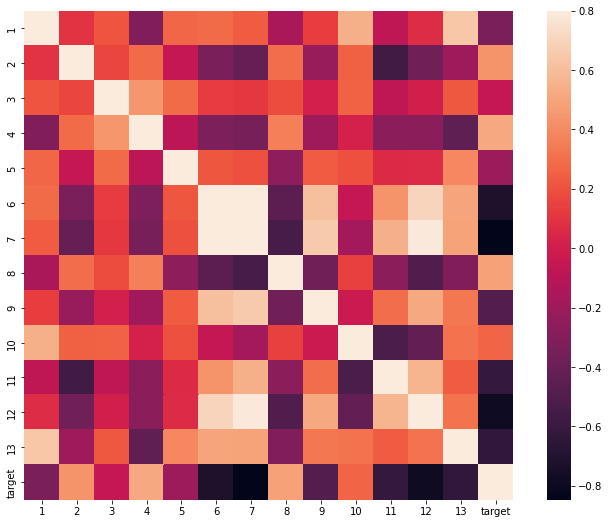

In [153]:
correlation_matrix = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

###  Evaluation of Decision Tree on Wine Dataset

In [154]:
dt = tree.DecisionTreeClassifier(random_state=0)
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
train_start_time=datetime.datetime.now()
decision_tree_acc= accuracy_score(y_test, y_pred)
train_end_time=datetime.datetime.now()
print("Time taken to train a decision tree",  (train_end_time - train_start_time).total_seconds(), " ms")
print("Accuracy of the decision tree model on Forest Cover dataset is:", decision_tree_acc)

Time taken to train a decision tree 0.000641  ms
Accuracy of the decision tree model on Forest Cover dataset is: 0.9333333333333333


In [155]:
print("CONFUSION MATRIX")
confusion_matrix = tf.math.confusion_matrix(
    y_test, y_pred, num_classes=3
)

sess = tf.Session()
with sess.as_default():
        print(sess.run(confusion_matrix))


CONFUSION MATRIX
[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


In [156]:
print("PARAMETERS OF THE DECISION TREE")
dt.get_params(deep=True)

PARAMETERS OF THE DECISION TREE


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [157]:
print("FEATURE IMPORTANCES")
print(pd.DataFrame(dt.feature_importances_, columns =["FEATURE WEIGHTS"]))


FEATURE IMPORTANCES
    FEATURE WEIGHTS
0          0.000000
1          0.018881
2          0.022165
3          0.000000
4          0.000000
5          0.000000
6          0.432419
7          0.000000
8          0.000000
9          0.403156
10         0.000000
11         0.000000
12         0.123378


### SPLIT STRUCTURE

[Text(418.5, 489.24, 'color_intensity <= 3.82\ngini = 0.664\nsamples = 133\nvalue = [43, 50, 40]\nclass = class_1'),
 Text(251.10000000000002, 380.52000000000004, 'proline <= 1002.5\ngini = 0.117\nsamples = 48\nvalue = [3, 45, 0]\nclass = class_1'),
 Text(167.4, 271.8, 'ash <= 3.0\ngini = 0.043\nsamples = 46\nvalue = [1, 45, 0]\nclass = class_1'),
 Text(83.7, 163.08000000000004, 'gini = 0.0\nsamples = 45\nvalue = [0, 45, 0]\nclass = class_1'),
 Text(251.10000000000002, 163.08000000000004, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = class_0'),
 Text(334.8, 271.8, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = class_0'),
 Text(585.9, 380.52000000000004, 'flavanoids <= 1.58\ngini = 0.554\nsamples = 85\nvalue = [40, 5, 40]\nclass = class_0'),
 Text(502.20000000000005, 271.8, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]\nclass = class_2'),
 Text(669.6, 271.8, 'proline <= 737.0\ngini = 0.198\nsamples = 45\nvalue = [40, 5, 0]\nclass = class_0'),
 Text(585.9, 163.08000000000004

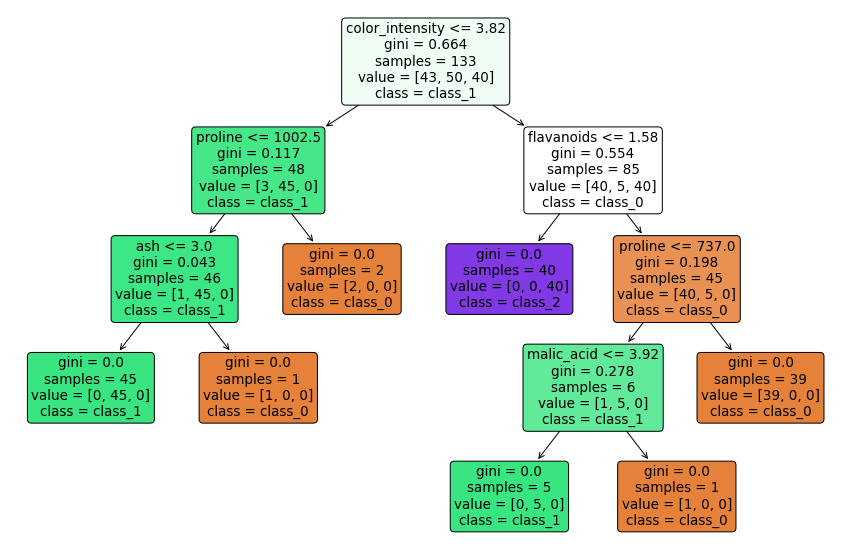

In [158]:
fig = plt.figure(figsize=(15, 10))
plot_tree(dt, 
          feature_names=wine_data.feature_names,
          class_names=wine_data.target_names, 
          filled=True, impurity=True, 
          rounded=True)

### Evaluation of Random Forest on Wine Dataset

In [162]:
rf = RandomForestClassifier(n_estimators=50)
rf=rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
train_start_time=datetime.datetime.now()
random_forest_acc= accuracy_score(y_test, y_pred)
train_end_time=datetime.datetime.now()
print("Time taken to train random forest ",  (train_end_time - train_start_time).total_seconds(), " ms")
print("Accuracy of the random forest algorithm on Wine dataset is:", random_forest_acc)

Time taken to train random forest  0.000376  ms
Accuracy of the random forest algorithm on Wine dataset is: 0.9777777777777777


In [163]:
print("CONFUSION MATRIX")
confusion_matrix = tf.math.confusion_matrix(
    y_test, y_pred, num_classes=3
)

sess = tf.Session()
with sess.as_default():
        print(sess.run(confusion_matrix))


CONFUSION MATRIX
[[16  0  0]
 [ 0 20  1]
 [ 0  0  8]]


In [164]:
print("PARAMETERS OF THE RANDOM FOREST")
rf.get_params(deep=True)

PARAMETERS OF THE RANDOM FOREST


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [165]:
print("FEATURE IMPORTANCES")
print(pd.DataFrame(dt.feature_importances_, columns =["FEATURE WEIGHTS"]))

FEATURE IMPORTANCES
    FEATURE WEIGHTS
0          0.000000
1          0.018881
2          0.022165
3          0.000000
4          0.000000
5          0.000000
6          0.432419
7          0.000000
8          0.000000
9          0.403156
10         0.000000
11         0.000000
12         0.123378


### Evaluation of Random Forest as an ensemble of decisionTress
We visualise each estimator i.e each decision Tree of the random forest ensemble and evaluate the performance of each decision tree

In [166]:
rf_dt_accuracies=[]
best_estimator=rf.estimators_[0]
best_accuracy=0
for n in range(0,50):
    dt=rf.estimators_[n]
    dt = dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    decision_tree_acc= accuracy_score(y_test, y_pred)
    if(decision_tree_acc>best_accuracy):
        best_accuracy=decision_tree_acc
        best_estimator=dt
    rf_dt_accuracies.append(decision_tree_acc)
    print("The accuracy of the decision tree ",n, " is ",decision_tree_acc )


The accuracy of the decision tree  0  is  0.8888888888888888
The accuracy of the decision tree  1  is  0.8666666666666667
The accuracy of the decision tree  2  is  0.9111111111111111
The accuracy of the decision tree  3  is  0.9333333333333333
The accuracy of the decision tree  4  is  0.9333333333333333
The accuracy of the decision tree  5  is  0.9111111111111111
The accuracy of the decision tree  6  is  0.9111111111111111
The accuracy of the decision tree  7  is  0.8888888888888888
The accuracy of the decision tree  8  is  0.8222222222222222
The accuracy of the decision tree  9  is  0.9333333333333333
The accuracy of the decision tree  10  is  0.9333333333333333
The accuracy of the decision tree  11  is  0.9333333333333333
The accuracy of the decision tree  12  is  0.8444444444444444
The accuracy of the decision tree  13  is  0.8888888888888888
The accuracy of the decision tree  14  is  0.8666666666666667
The accuracy of the decision tree  15  is  0.8444444444444444
The accuracy of th

### Evaluating the split structure of estimators of random forest

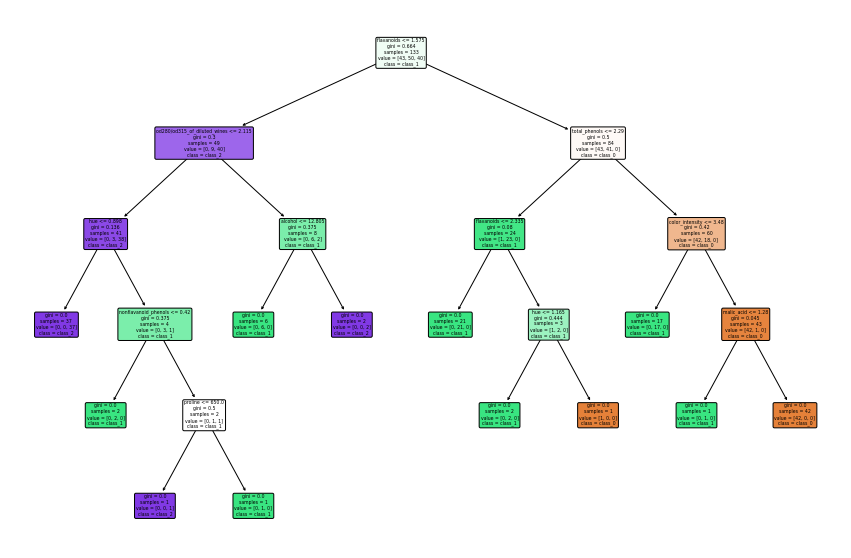

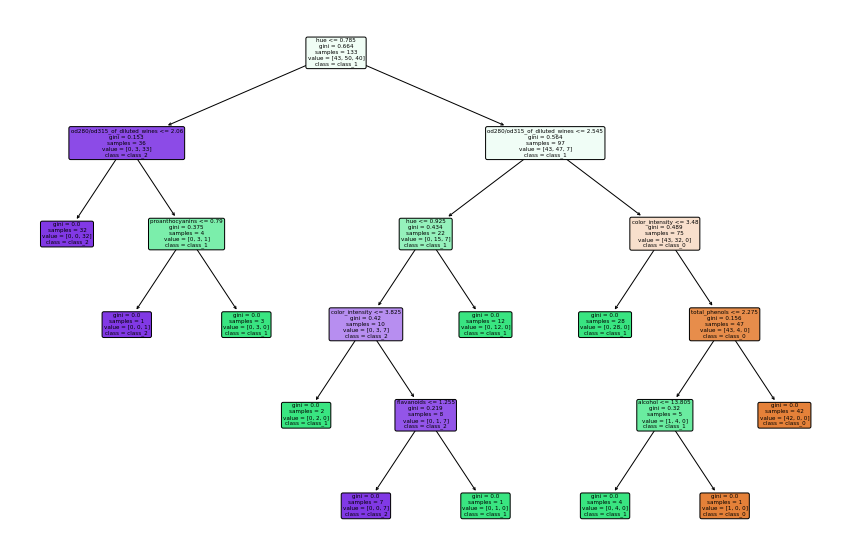

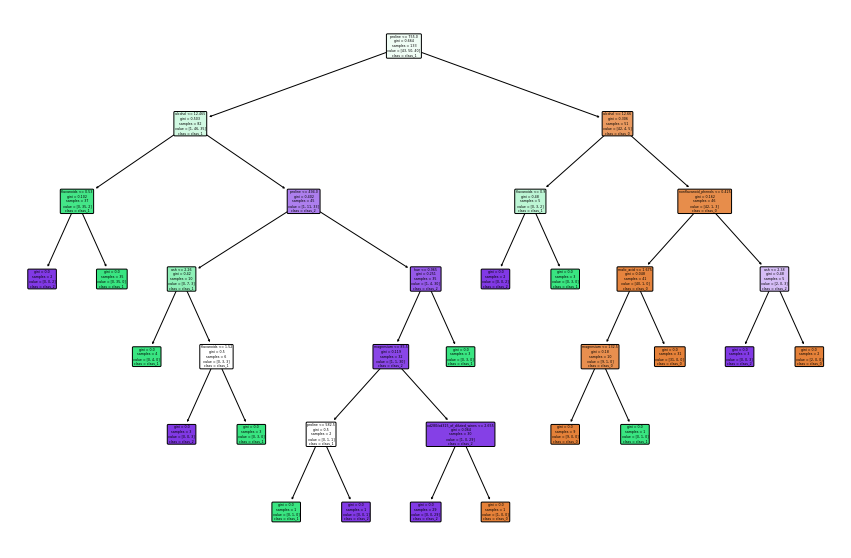

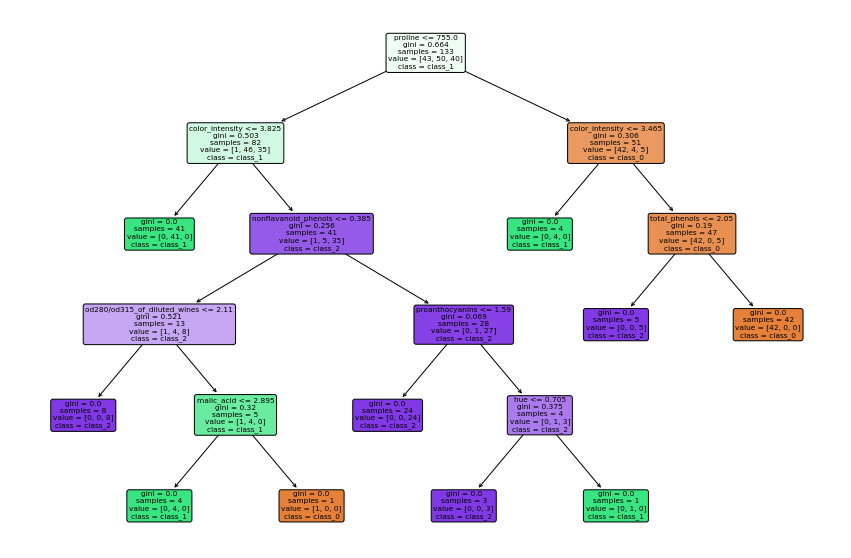

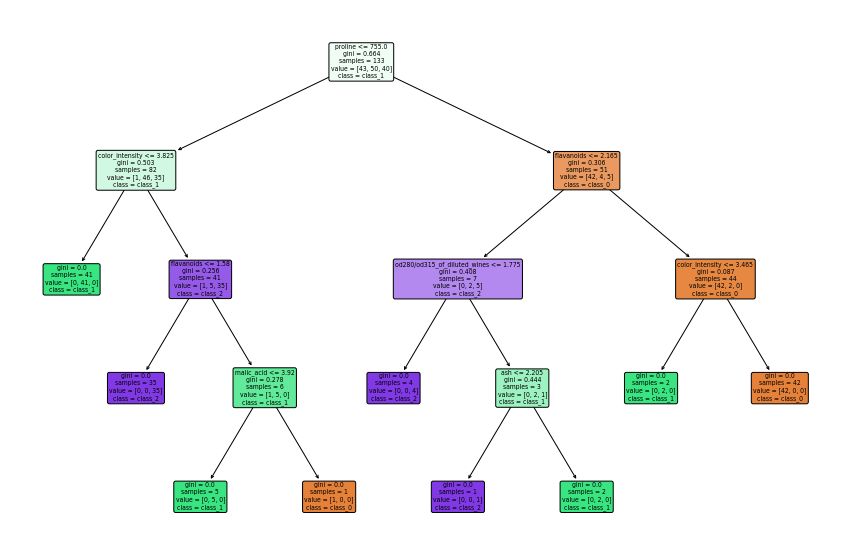

In [167]:

for n in range(0,5):
    fig = plt.figure(figsize=(15, 10))
    plot_tree(rf.estimators_[n], 
              feature_names=wine_data.feature_names,
              class_names=wine_data.target_names, 
              filled=True, impurity=True, rounded=True)

### Evaluating the split structure of the best estimator of the random forest

[Text(1162.5, 1274.0625, 'od280/od315_of_diluted_wines <= 2.115\ngini = 0.664\nsamples = 133\nvalue = [43, 50, 40]\nclass = class_1'),
 Text(775.0, 1104.1875, 'hue <= 0.898\ngini = 0.172\nsamples = 42\nvalue = [0, 4, 38]\nclass = class_2'),
 Text(465.0, 934.3125, 'color_intensity <= 4.9\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]\nclass = class_2'),
 Text(310.0, 764.4375, 'flavanoids <= 1.42\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = class_2'),
 Text(155.0, 594.5625, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]\nclass = class_2'),
 Text(465.0, 594.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = class_1'),
 Text(620.0, 764.4375, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]\nclass = class_2'),
 Text(1085.0, 934.3125, 'alcohol <= 13.48\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]\nclass = class_1'),
 Text(930.0, 764.4375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = class_1'),
 Text(1240.0, 764.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = c

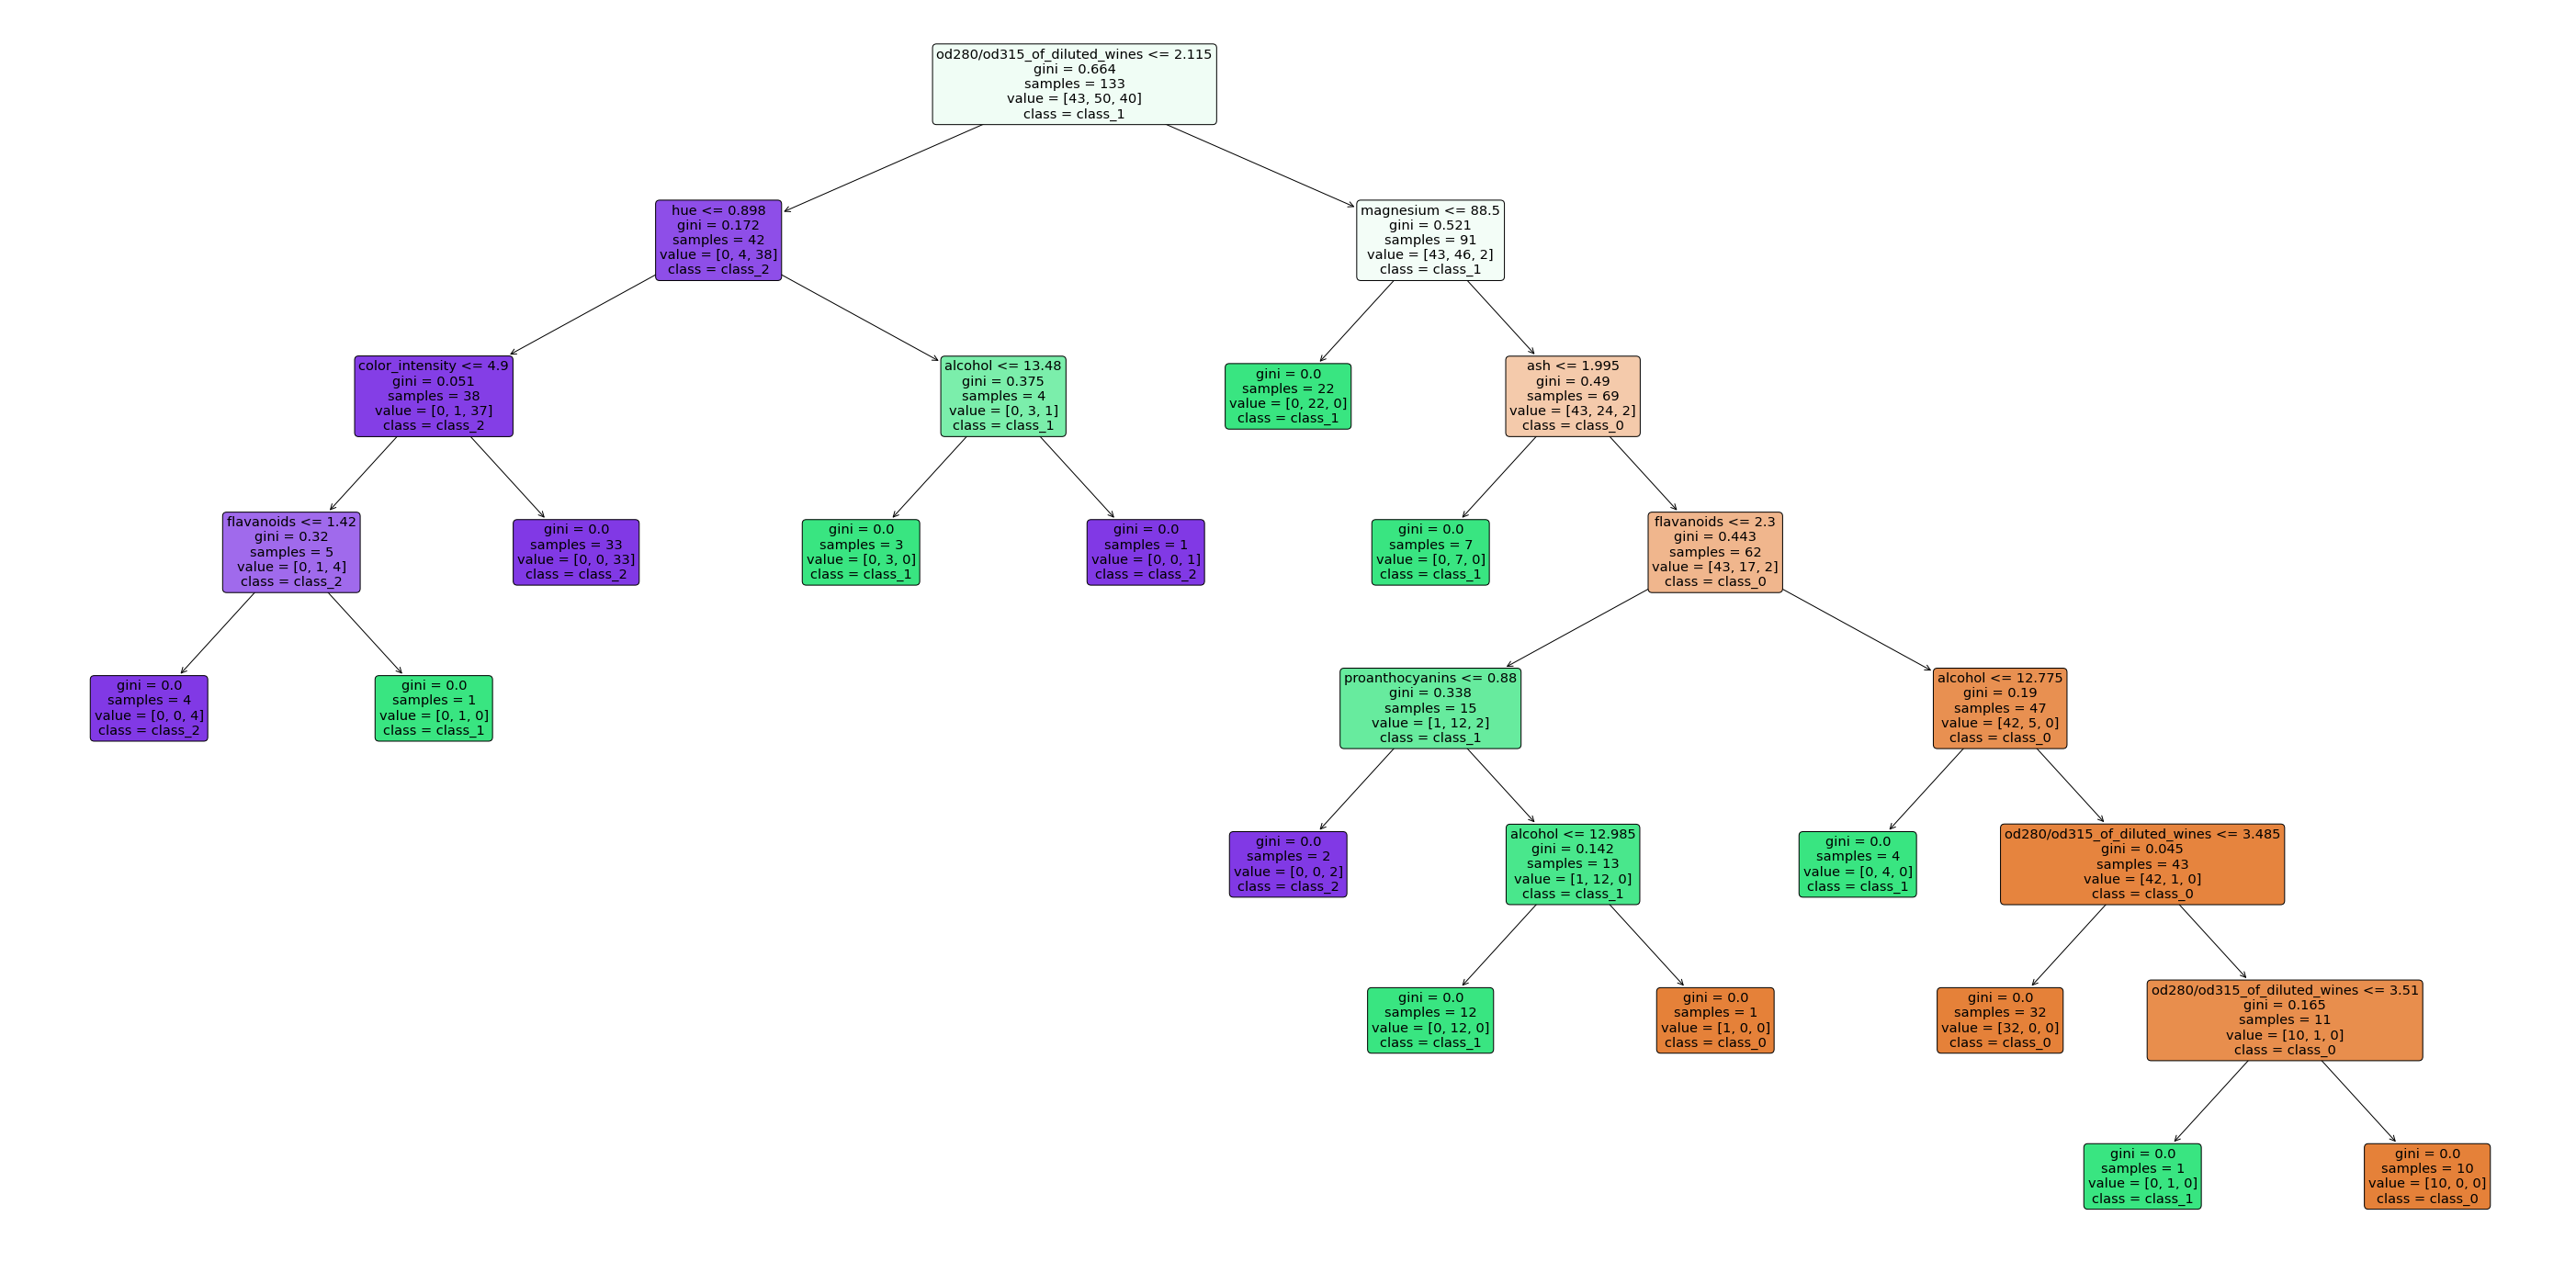

In [127]:
fig = plt.figure(figsize=(50, 25))
plot_tree(best_estimator, 
          feature_names=wine_data.feature_names,
          class_names=wine_data.target_names, 
          filled=True, impurity=True, rounded=True)

### Evaluation of the top 10 decision Trees in random forest:

In [172]:
sorted_accuracies= sorted(rf_dt_accuracies,reverse=True)


In [173]:
print("TEST ACCURACIES FOR TOP TEN DECISION TREES ")

top_ten=pd.DataFrame(data=sorted_accuracies,columns=["Top 10 Accuracies"])
print(top_ten[0:10])

TEST ACCURACIES FOR TOP TEN DECISION TREES 
   Top 10 Accuracies
0           0.977778
1           0.955556
2           0.955556
3           0.955556
4           0.955556
5           0.955556
6           0.955556
7           0.955556
8           0.955556
9           0.933333


### Evaluation of the bottom 10 Decision Trees in random forest:

In [170]:
print("TEST ACCURACIES FOR BOTTOM TEN DECISION TREES ")

top_ten=pd.DataFrame(data=sorted_accuracies,columns=["Bottom 10 Accuracies"])
print(top_ten[-10:])

TEST ACCURACIES FOR BOTTOM TEN DECISION TREES 
    Bottom 10 Accuracies
40              0.866667
41              0.844444
42              0.844444
43              0.844444
44              0.844444
45              0.844444
46              0.844444
47              0.844444
48              0.822222
49              0.822222


### Evaluation the effect of number of estimators on the accuracy

In [60]:
accuraries=[]
for n_e in range(1,20):
    rf = RandomForestClassifier(n_estimators=n_e)
    rf=rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    random_forest_acc= accuracy_score(y_test, y_pred)
    accuraries.append(random_forest_acc)

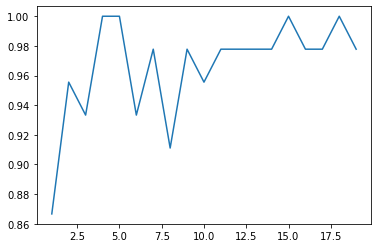

In [61]:
plt.plot(list(range(1,20)),accuraries)
plt.show()